In [1]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_path = "../imgs/imgs_sel/"

In [39]:
image_path_1 = data_path + "tartaruga1A.JPG"
image_path_2 = data_path + "tartaruga1B.JPG"

In [40]:
img1 = cv2.imread(image_path_1)
img_gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img_gray1=cv2.GaussianBlur(img_gray1, (5, 5), 0)

input_image_1 = img_gray1

In [41]:
img2 = cv2.imread(image_path_2)
img_gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img_gray2=cv2.GaussianBlur(img_gray2, (5, 5), 0)

input_image_2 = img_gray2

In [42]:
sift = cv2.SIFT_create()

In [43]:
keypoints1, descriptors1 = sift.detectAndCompute(input_image_1, None)
keypoints2, descriptors2 = sift.detectAndCompute(input_image_2, None)

In [44]:
FLAN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLAN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [45]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [46]:
matches = flann.knnMatch(descriptors1, descriptors2, k=2)

In [47]:
matchesMask = [[0,0] for i in range(len(matches))]

In [48]:
for i,(m1, m2) in enumerate (matches):
    if m1.distance < 0.7 * m2.distance:
        matchesMask[i] = [1,0]

In [49]:
draw_params = dict(matchColor = (0,0,255), singlePointColor = (0,255,0), matchesMask = matchesMask, flags=2)

In [50]:
good_matches = []

for m1, m2 in matches:
    if m1.distance < 0.7 * m2.distance:
        good_matches.append([m1])

14


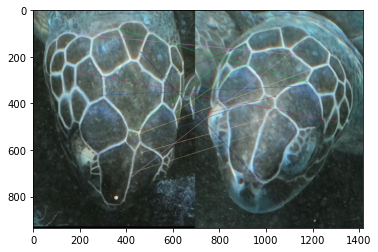

In [51]:
flann_matches = cv2.drawMatchesKnn(img1, keypoints1, img2, keypoints2, good_matches, None, flags=2)
print(len(good_matches))
plt.imshow(flann_matches)